# Linear Regression - Gradient Descent

Implementing a linear regression model that predicts the salary of an employee based on the experience.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df = pd.read_csv('data.csv')

In [3]:
# Describe the data and store it as arrays
print('Description of the dataframe: ', df.describe())
x_train = (df['exp(in months)'])
y_train = (df['salary(in thousands)'])
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

Description of the dataframe:         exp(in months)  salary(in thousands)
count     1000.000000           1000.000000
mean        26.157825             26.722597
std          8.717091              8.844761
min          0.697594             -1.276342
25%         20.073600             20.531008
50%         25.875225             26.745576
75%         32.406986             32.615753
max         49.463222             55.297016
The shape of x_train is: (1000,)
The shape of y_train is:  (1000,)
Number of training examples (m): 1000


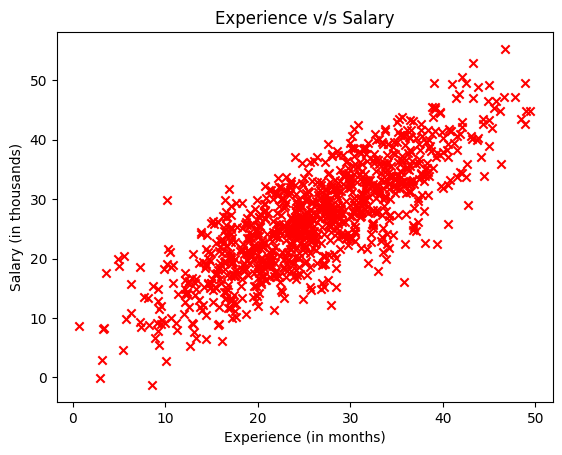

In [4]:
# Visualize the data
plt.scatter(x_train, y_train, marker='x', c='r') 
# Set the title
plt.title("Experience v/s Salary")
# Set the y-axis label
plt.ylabel('Salary (in thousands)')
# Set the x-axis label
plt.xlabel('Experience (in months)')
plt.show()

### Understanding the Linear Regression Model
  Fitting the linear regression parameters $(w,b)$ to the dataset.
- The model function for linear regression, which is a function that maps from `x` (Experience (in months)) to `y` (Salary (in thousands)) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model i.e. to find the best $(w,b)$ parameters that fit the given dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice,it can be evaluated using a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits the given data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, a method called **gradient descent** can be used. 
  - With each step of gradient descent, the parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (Experince) and output a prediction $f_{w,b}(x)$ (Salary).

### Computing the Cost

Gradient descent involves repeated steps to adjust the value of the parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful to monitor the progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.

#### Cost function
The cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- $f_{w,b}(x^{(i)})$ can be thought of as the model's prediction of the salary, as opposed to $y^{(i)}$, which is the actual salary that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is represented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

The `compute_cost()` function below computes the cost $J(w,b)$.

In [5]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

### Gradient descent 

Implementing the gradient for parameters $w, b$ for linear regression.

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously, $\alpha$ is the learning rate and:
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

### Implementation
The function `compute_gradient` calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$. 

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

#### Batch gradient descent 

Finding the optimal parameters of a linear regression model by using batch gradient descent. Here batch refers to running all the examples in one iteration.

- A way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Here if an appropriate value for $\alpha$ is chosen, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [7]:
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))    :    Data, m examples 
      y (ndarray (m,))    :    Target values
      w_in, b_in (scalar) :    Initial values of model parameters  
      alpha (float)       :    Learning rate
      num_iters (int)     :    Number of iterations to run gradient descent
      cost_function       :    Function to call to produce cost
      gradient_function   :    Function to call to produce gradient
      
    Returns:
      w (scalar)            :    final value of parameter w
      b (scalar)            :    final value of parameter b
      J_history (List)      :    History of cost values
      w_b_history (list)    :    History of parameters [w,b] 
      """
    
    # An array to store cost J and value of w and b at each iteration primarily for graphing later
    J_history = []
    w_b_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)     

        # Update Parameters
        w = w - alpha * dj_dw                            
        b = b - alpha * dj_db                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w , b)
            J_history.append(cost)
            w_b_history.append([w,b])
            
        # Print cost every at intervals 10 times or as many iterations if i < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, w_b_history

In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-5
# run gradient descent
w_final, b_final, J_hist, w_b_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.90e+02  dj_dw: -7.615e+02, dj_db: -2.672e+01  w:  7.615e-03, b: 2.67226e-04
Iteration 1000: Cost 1.47e+01  dj_dw: -3.486e-01, dj_db: -5.272e-01  w:  9.999e-01, b: 3.95736e-02
Iteration 2000: Cost 1.47e+01  dj_dw:  1.752e-02, dj_db: -5.141e-01  w:  1.000e+00, b: 4.47335e-02
Iteration 3000: Cost 1.47e+01  dj_dw:  1.768e-02, dj_db: -5.136e-01  w:  1.000e+00, b: 4.98719e-02
Iteration 4000: Cost 1.47e+01  dj_dw:  1.766e-02, dj_db: -5.131e-01  w:  9.999e-01, b: 5.50051e-02
Iteration 5000: Cost 1.47e+01  dj_dw:  1.764e-02, dj_db: -5.126e-01  w:  9.997e-01, b: 6.01333e-02
Iteration 6000: Cost 1.47e+01  dj_dw:  1.762e-02, dj_db: -5.120e-01  w:  9.995e-01, b: 6.52563e-02
Iteration 7000: Cost 1.47e+01  dj_dw:  1.761e-02, dj_db: -5.115e-01  w:  9.993e-01, b: 7.03742e-02
Iteration 8000: Cost 1.47e+01  dj_dw:  1.759e-02, dj_db: -5.110e-01  w:  9.992e-01, b: 7.54870e-02
Iteration 9000: Cost 1.47e+01  dj_dw:  1.757e-02, dj_db: -5.105e-01  w:  9.990e-01, b: 8.05947e-02
(w,b) foun

### Predicting values using the learned linear regression parameters $(w,b)$.

In [9]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] + b_final

### Plotting the linear fit along with the data.

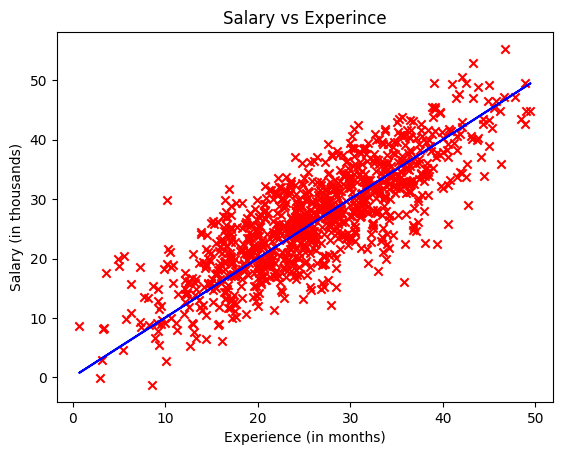

In [10]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")
# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Salary vs Experince")

plt.ylabel('Salary (in thousands)')

plt.xlabel('Experience (in months)')

plt.show()

### Plotting the cost function over iterations to see how it decreases, along with the parameters $(w,b)$ over iterations to see how they converge.

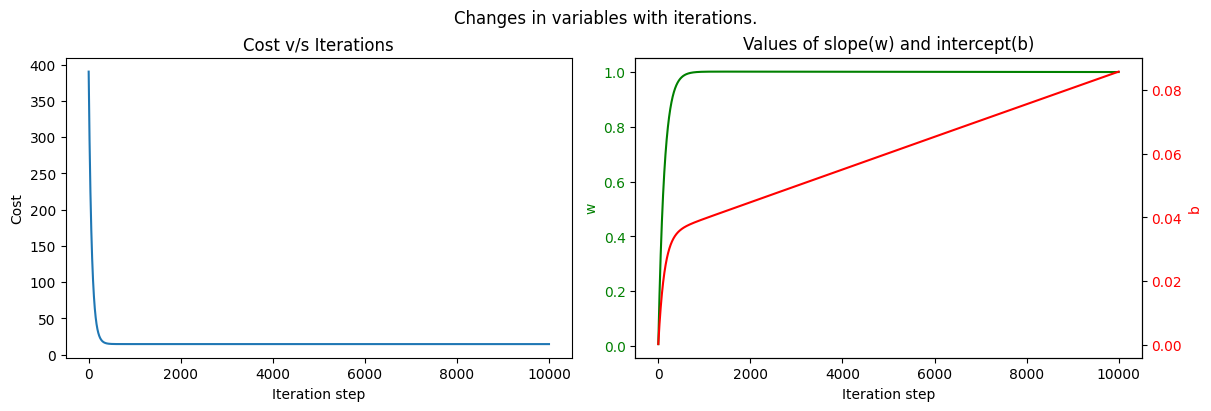

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
fig.suptitle('Changes in variables with iterations.')

ax1.plot(J_hist)
ax1.set_title("Cost v/s Iterations");
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')

# Plotting w and b on separate y-axes
ax2.plot([item[0] for item in w_b_hist], c='g', label='w')
ax2.set_ylabel('w', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_xlabel('Iteration step')
ax2.set_title("Values of slope(w) and intercept(b)")

ax2_twin = ax2.twinx()
ax2_twin.plot([item[1] for item in w_b_hist], c='r', label='b')
ax2_twin.set_ylabel('b', color='r')
ax2_twin.tick_params(axis='y', labelcolor='r')
plt.show()